In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (15,9)

In [49]:
def plot_spectrum(fft_spectrum :np.array,f_s:int) -> None:
    n_s = len(fft_spectrum)
    x = np.linspace(0,f_s/2,(n_s//2)+1)
    plt.bar(x, np.abs(fft_spectrum[:(n_s//2)+1]))
    plt.xlabel('Hz')
    plt.ylabel('widmo')
    plt.title('Widmo sygnału')
    plt.show()
    
def plot_signal(signal :np.array,n: int = None,title = "Sygnał odzyskany") ->None:
    if n is None:
        n = len(signal)
    n_axis = np.arange(n)
    plt.plot(n_axis, signal[:n])
    plt.xlabel('nr próbki')
    plt.ylabel('amplituda')
    plt.title(title)
    plt.show()     

# 1.

In [ ]:
#wczytywanie do dataframe
ekg100 = pd.read_csv("ekg100.txt",header=None)
f_ekg100 = 360 #Hz
ekg100.index = ekg100.index/f_ekg100
ekg100.index.rename("czas",inplace=True)
ekg100.columns = ["sygnał"]
ekg100

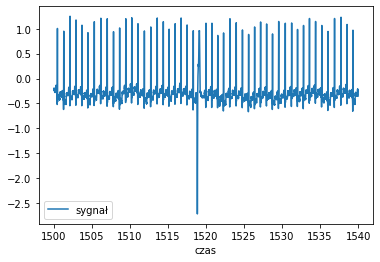

In [15]:
time_begin = 1500# x.xxx s min 0.000
time_end = 1540 # x.xxx s 
y_min = None
y_max = None
y_label = "sygnal"
x_min = None
x_max = None
x_label = "Czas"

ekg100.loc[time_begin:time_end].plot(xlim=[x_min,x_max],ylim=[y_min,y_max])

# 2.

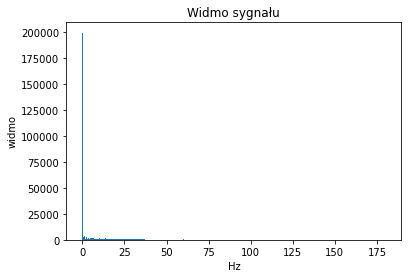

In [47]:
spectrum = np.fft.fft(ekg100["sygnał"])

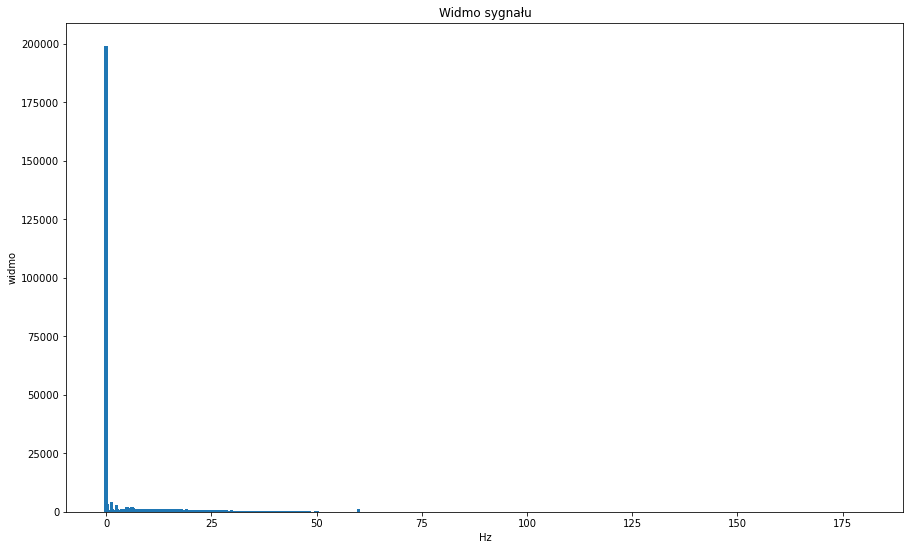

In [50]:
plot_spectrum(spectrum,f_ekg100)

# 3.

d:\studia\vi semestr\cpsio\venv\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


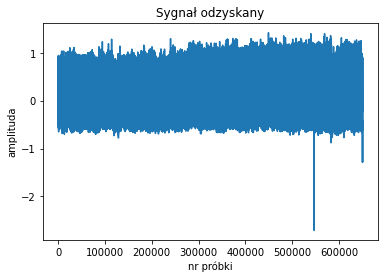

In [26]:
signal_restored = np.fft.ifft(spectrum)
plot_signal(signal_restored)

,sygnał,restored_signal
czas,,
0.000000,-0.145,-0.145000-0.000000j
0.002778,-0.145,NaN
0.005556,-0.145,NaN
0.008333,-0.145,NaN
0.011111,-0.145,NaN
...,...,...
1805.541667,-0.075,NaN
1805.544444,-0.445,NaN
1805.547222,-0.675,NaN


In [37]:
seria = pd.Series(np.real(signal_restored))
seria.index = ekg100.index
ekg100["restored_signal"] = seria
ekg100


,sygnał,restored_signal
czas,,
0.000000,-0.145,-0.145
0.002778,-0.145,-0.145
0.005556,-0.145,-0.145
0.008333,-0.145,-0.145
0.011111,-0.145,-0.145
...,...,...
1805.541667,-0.075,-0.075
1805.544444,-0.445,-0.445
1805.547222,-0.675,-0.675


In [38]:
ekg100["diff"] = ekg100["restored_signal"] - ekg100["sygnał"]
ekg100

,sygnał,restored_signal,diff
czas,,,
0.000000,-0.145,-0.145,8.326673e-17
0.002778,-0.145,-0.145,-2.775558e-17
0.005556,-0.145,-0.145,1.942890e-16
0.008333,-0.145,-0.145,-5.551115e-17
0.011111,-0.145,-0.145,1.110223e-16
...,...,...,...
1805.541667,-0.075,-0.075,4.163336e-17
1805.544444,-0.445,-0.445,-1.110223e-16
1805.547222,-0.675,-0.675,-1.110223e-16


In [46]:
ekg100["diff"].max()/ekg100["sygnał"].mean()

-1.812319185290611e-15